# Spring-Mass System

## 1 Coupled Spring-Mass System and SciPy
Reference: https://scipy-cookbook.readthedocs.io/items/CoupledSpringMassSystem.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [35]:
def SMsystem(w, t, p):
    
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2 = p
    
    f = [                                                    y1,
         (-b1 * y1 - k1 * (x1 - L1) + k2 * (x2 - x1 - L2)) / m1,
                                                             y2,
                          (-b2 * y2 - k2 * (x2 - x1 - L2)) / m2,
        ]
    
    return f

In [78]:
m1 = 01.0
m2 = 01.5
k1 = 80.0
k2 = 40.0
L1 = 00.5
L2 = 01.0
b1 = 00.8
b2 = 00.5
x1 = 0.50
y1 = 0.00
x2 = 2.25
y2 = 0.00

abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 250

t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]


p  = [m1, m2, k1, k2, L1, L2, b1, b2]
w0 = [                x1, y1, x2, y2]

In [79]:
wsol = odeint(SMsystem, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

In [80]:
x1_out = [val[0] for val in wsol]
x2_out = [val[2] for val in wsol]

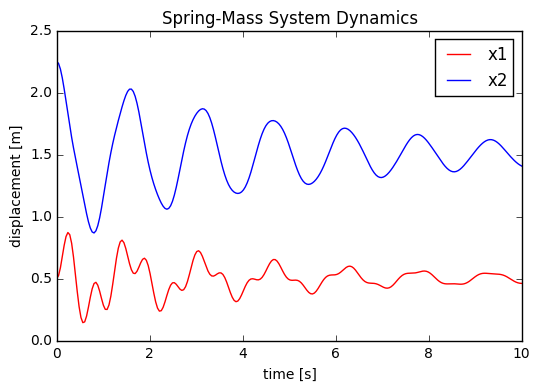

In [82]:
plt.plot(t, x1_out, color = 'r')
plt.plot(t, x2_out, color = 'b')
plt.xlabel('time [s]')
plt.ylabel('displacement [m]')
plt.title('Spring-Mass System Dynamics')
plt.legend(('x1', 'x2'))
plt.show()

## 2 Simple Spring-Mass System
Reference: https://www.youtube.com/watch?v=6e6wysa5Qho, https://www.youtube.com/watch?v=ypEt3c-gw5s

Starts with one 2nd order ODE. Derivation as follows:
$$ma = F$$
$$ma + kx = 0$$
$$m\frac{\text{d}^2 x}{\text{d} t^2} + kx = 0$$
$$\frac{\text{d}^2 x}{\text{d} t^2} = -\frac{k}{m}x $$

Substitution:
$$\frac{\text{d} v}{\text{d} t} = \frac{\text{d}^2 x}{\text{d} t^2}$$

System of two 1st order ODEs:
$$\frac{\text{d} x}{\text{d} t} = v$$
$$\frac{\text{d} v}{\text{d} t} = -\frac{k}{m}x $$

Euler update method, timestep h:
$$t_{i + 1} = t_{i} + h$$
$$x(t_{i + 1}) = x(t_{i}) + hv(t_{i})$$
$$v(t_{i + 1}) = v(t_{i}) + ha(t_{i})$$
$$a(t_{i}) = -\frac{k}{m}x(t_{i})$$
$$v(t_{i + 1}) = v(t_{i}) -h\frac{k}{m}x(t_{i})$$

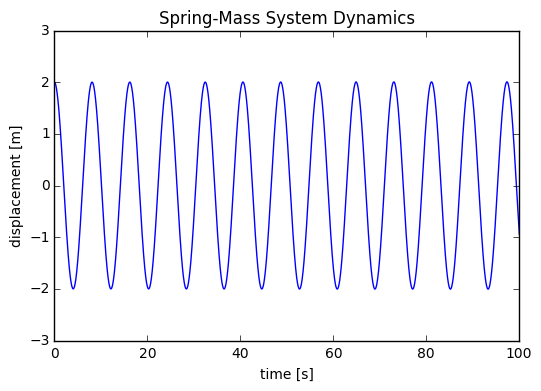

In [31]:
m = 5 # kg
k = 3 # N/m
h = 0.0001 # s
t_end = 100 # s

t = np.arange(0, t_end + h, h) # s
x = np.zeros(len(t)) # m
v = np.zeros(len(t)) # m/s
x[0] = 2
v[0] = 0

for i in range(len(t) - 1):
    x[i + 1] = x[i] + h * v[i]
    v[i + 1] = v[i] + h * (-k / m) * x[i]
    
plt.plot(t, x, color = 'b')
plt.xlabel('time [s]')
plt.ylabel('displacement [m]')
plt.title('Spring-Mass System Dynamics')
plt.show()